In [1]:
# Perform the necessary imports
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# mpl.use('webAgg')  # abre um navegador pra visualizar o gráfico gerado

In [3]:
np.random.seed(42)
N_SAMPLES = 300
N_LABELS = 6
samples = np.array(np.random.random((N_SAMPLES, 3)) * (np.random.random() * 100))
samples_labels = np.array(np.random.choice(N_LABELS, N_SAMPLES))

In [4]:
samples[1:10]

array([[12.44528704,  3.24341309,  3.24291167],
       [ 1.20747846, 18.00661152, 12.49635487],
       [14.71985566,  0.42792334, 20.1630927 ],
       [17.30533832,  4.41423825,  3.77989115],
       [ 3.81272767,  6.32477805, 10.90896494],
       [ 8.97954324,  6.05425353, 12.7195807 ],
       [ 2.89988563,  6.07328569,  7.61615916],
       [ 9.48106811, 16.32272902,  4.15094348],
       [10.69022717, 12.31548462,  0.96564024]])

In [5]:
samples_labels[1:10]

array([4, 2, 3, 4, 3, 1, 1, 0, 4])

In [6]:
# Create scaler: scaler
scaler = StandardScaler()
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=N_LABELS)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [7]:
# Fit the pipeline to samples
pipeline.fit(samples)
# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

In [8]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'real_labels': samples_labels})
# Create crosstab: ct
ct = pd.crosstab(df.labels, df.real_labels)

In [9]:
ct

real_labels,0,1,2,3,4,5
labels,,,,,,
0,6,12,9,10,11,10
1,5,5,6,6,5,7
2,8,9,5,4,6,9
3,15,13,8,11,11,10
4,6,12,9,6,9,8
5,11,5,12,5,13,3


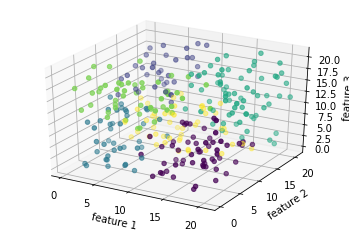

In [10]:
# plot graphic with clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')

x = samples[:, 0]
y = samples[:, 1]
z = samples[:, 2]

ax.scatter(x, y, z, c=labels, marker='o')
plt.show()